In [1]:
import pandas as pd
data = pd.read_csv("data.csv")

In [2]:
x_features = ["p11", "p21", "b1", "b2", "l1","l2"]#,"cl1", "cl2"
y_features = ["d11", "d12", "d21", "d22"]

X = data[x_features]
Y = data[y_features]

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

merge_raw = pd.concat([X, Y], axis=1)
train, test = train_test_split(merge_raw, test_size=0.3)
# Sort index in train, test
train = train.sort_index(axis=0)
test = test.sort_index(axis=0)
X_train = train[x_features].iloc[1:]
X_test = test[x_features].iloc[1:]
Y_train = train[y_features].iloc[1:]
Y_test = test[y_features].iloc[1:]

<frozen importlib._bootstrap>:228: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


In [4]:
from sklearn.metrics import r2_score
def test_train_nmae_r2score(test_predicted_values, train_predicted_values, test_set, train_set):
    col_size = train_set.shape[1]
    test_nmaes = []
    train_names = []
    test_r2s = []
    train_r2s = []
    for i in range(col_size):
        diff_test = np.abs(test_predicted_values[:,i] - test_set.iloc[:,i])
        test_nmae = (diff_test.mean()) / test_set.iloc[:,i].mean()
        test_r2score = r2_score(test_set.iloc[:,i], test_predicted_values[:,i])
        diff_train = np.abs(train_predicted_values[:,i] - train_set.iloc[:,i])
        train_nmae = (diff_train.mean()) / train_set.iloc[:,i].mean()
        train_r2score = r2_score(train_set.iloc[:,i], train_predicted_values[:,i])
        test_nmaes.append(test_nmae)
        train_names.append(train_nmae)
        test_r2s.append(test_r2score)
        train_r2s.append(train_r2score)
    return test_nmaes, train_names, test_r2s, train_r2s

In [5]:
import numpy as np
regressor = RandomForestRegressor(n_estimators=120, n_jobs=-1)
regressor.fit(X_train, Y_train)
pred_test = regressor.predict(X_test)
print(pred_test.shape)
predict_test = (np.array(pred_test)).reshape(pred_test.shape[0], 4)

pred_train = regressor.predict(X_train)
predict_train = (np.array(pred_train)).reshape(pred_train.shape[0], 4)

test_nmae, train_nmae, test_r2score, train_r2score = test_train_nmae_r2score(predict_test, predict_train, Y_test,
                                                                             Y_train)

(13602, 4)


In [6]:
print(test_nmae, train_nmae, test_r2score, train_r2score)

[0.1051481810429014, 0.10292555934742385, 0.07961521198200482, 0.08067911031103835] [0.039793686084069725, 0.040058705190366535, 0.031164816140792986, 0.031208839303074623] [0.8679428136307762, 0.8697601174509411, 0.9021137870721214, 0.8963823933131837] [0.9800493874302, 0.979590723622318, 0.9838537787894532, 0.9834391681790737]


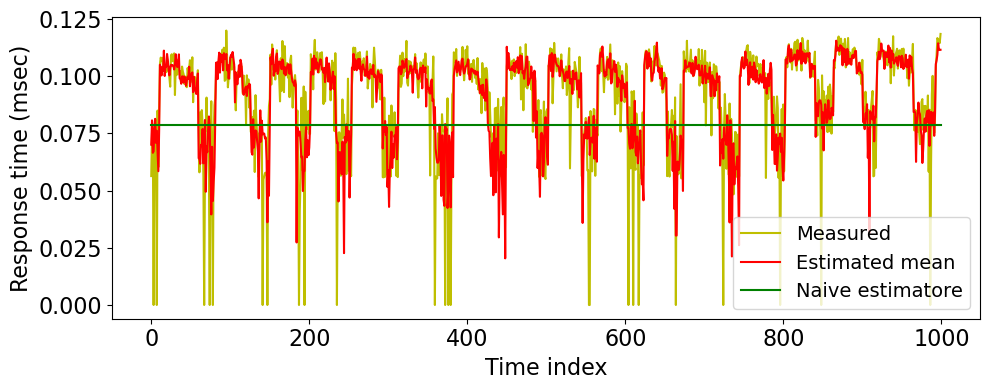

In [7]:
import matplotlib.pyplot as plt

test_size = Y_test.shape[0]
font_size = 16

baseline_value = Y_train.iloc[:,2].mean()
baseline_array = np.zeros(test_size)
for i in range(0,test_size):
    baseline_array[i] = baseline_value

start = 6000
end = 7000#test_size
N_size = end - start


x = np.linspace(0, N_size-1, N_size)
# x_labels = np.linspace(0, N_size-1, 10)
# labels = []
# for i in x_labels:
#     labels.append(i)
    
# print(labels)

fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(10, 4))
test_line = plt.plot(x,Y_test.iloc[start:end,2], color='y')
predict_line = plt.plot(x,predict_test[start:end,2], color='red')
baseline = plt.plot(np.linspace(0, N_size-1, N_size),baseline_array[start:end], color='g')
#fig.suptitle('Time Series Response Time of Read Values for KV', fontsize=23)
plt.xlabel('Time index', fontsize=font_size)
plt.ylabel('Response time (msec)', fontsize=font_size)
plt.legend(('Measured', 'Estimated mean','Naive estimatore'), shadow=False, fancybox=True, fontsize=font_size-2)
plt.tick_params(axis='both', which='major', labelsize=font_size)
plt.tick_params(axis='both', which='minor', labelsize=font_size)
# plt.xticks(x, labels, rotation=45)
plt.rcParams['savefig.dpi'] = 200
plt.tight_layout()
plt.show()

<class 'pandas.core.frame.DataFrame'>


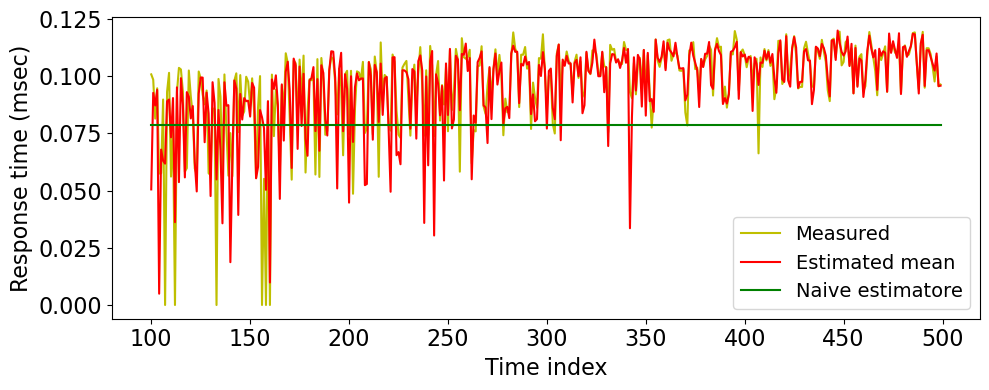

In [8]:
size = 500

dd = np.zeros((Y_test.shape[0], 3))
dd[:,0] = Y_test.iloc[:,2]
dd[:,1] = predict_test[:,2]
dd[:,2] = baseline_array

ddata = pd.DataFrame(dd, columns = ["test", "pred", "naive"])

dd1, dd2 = train_test_split(ddata, test_size=size)

dd2 = dd2.sort_index(axis=0)
print(type(dd2))

start = 100
end = dd2.shape[0]
x = np.linspace(start, size - 1, size-start)

fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(10, 4))
test_line = plt.plot(x,dd2.iloc[start:end,0], color='y')
predict_line = plt.plot(x,dd2.iloc[start:end,1], color='red')
baseline = plt.plot(x,dd2.iloc[start:end,2], color='g')
#fig.suptitle('Time Series Response Time of Read Values for KV', fontsize=23)
plt.xlabel('Time index', fontsize=font_size)
plt.ylabel('Response time (msec)', fontsize=font_size)
plt.legend(('Measured', 'Estimated mean','Naive estimatore'), shadow=False, fancybox=True, fontsize=font_size-2)
plt.tick_params(axis='both', which='major', labelsize=font_size)
plt.tick_params(axis='both', which='minor', labelsize=font_size)
# plt.xticks(x, labels, rotation=45)
plt.rcParams['savefig.dpi'] = 200
plt.tight_layout()
plt.show()

In [9]:
for j in range(Y_train.shape[1]):
    baseline_value = Y_train.iloc[:,j].mean()
    baseline_array = np.zeros(test_size)
    for i in range(0,test_size):
        baseline_array[i] = baseline_value

    baseline_array = (baseline_array).reshape(baseline_array.shape[0], 1)
    y_test = Y_test.iloc[:,j].values.reshape(Y_test.shape[0],1)
    diff_test = np.abs(baseline_array - y_test)
    test_nmae = (diff_test.mean()) / Y_test.iloc[:,j].mean()
    print(test_nmae)

0.41779497471428856
0.40902073235805336
0.4228406493421799
0.41676535990701985


In [ ]:
import joblib
joblib.dump(regressor, "./delays_RF_model.joblib")